In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as curve_fit
from scipy.optimize import minimize as minimize
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import *
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd
from lmfit import Model
from lmfit.models import GaussianModel,LinearModel
from functools import partial
from copy import deepcopy
%matplotlib notebook

In [2]:
ds = [0.0,0.3,0.5,1.0]
files = [f"6_angle_{i:.1f}mm.csv" for i in ds]

In [3]:
def read_file(name):
    data = pd.read_csv(name)
    N = unumpy.uarray(data.N,np.sqrt(data.N))
    t = unumpy.uarray(data.t,np.ones(data.t.shape[0]))
    theta = unumpy.uarray(data.angle,np.ones(data.angle.shape[0]))
    I = N/t
    a = lambda : None
    a.I = I
    a.theta = theta
    return a

In [4]:
data = [read_file(i) for i in files]

<IPython.core.display.Javascript object>


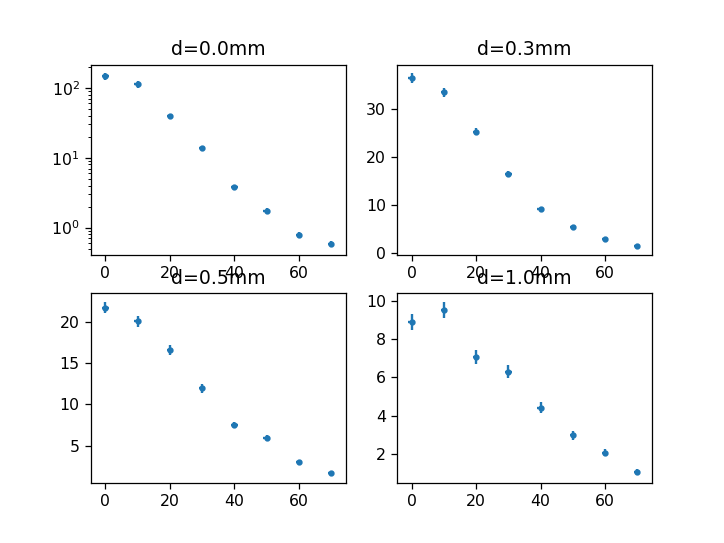

In [5]:
fig, axes = plt.subplots(2,2)
for i,d in enumerate(data):
    ax = axes[i//2,i%2]
    ax.errorbar(nv(d.theta),nv(d.I),yerr=sd(d.I),xerr=sd(d.theta),fmt='.')
    ax.set_title(f"d={ds[i]:.1f}mm")
axes[0,0].set_yscale('log')

I expect that plot 0 should be a gaussian, .3 also. 1.0mm should be the cos^2

<IPython.core.display.Javascript object>


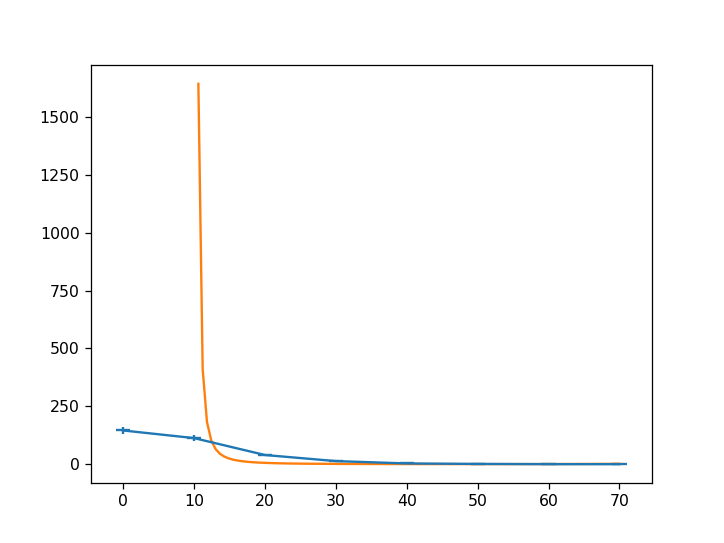

<ipython-input-6-b6b2822d490d>:3: RuntimeWarning: divide by zero encountered in true_divide
  ax.plot(np.linspace(10,70,100),1/np.sin(np.linspace(0,70,100)/180*2*np.pi)**2)


In [6]:
fig,ax = plt.subplots()#2,figsize=(12,6))
ax.errorbar(nv(data[0].theta),nv(data[0].I),xerr=sd(data[0].theta),yerr=sd(data[0].I))
ax.plot(np.linspace(10,70,100),1/np.sin(np.linspace(0,70,100)/180*2*np.pi)**2)
# ax[1].errorbar(nv(data[0].I))

<IPython.core.display.Javascript object>


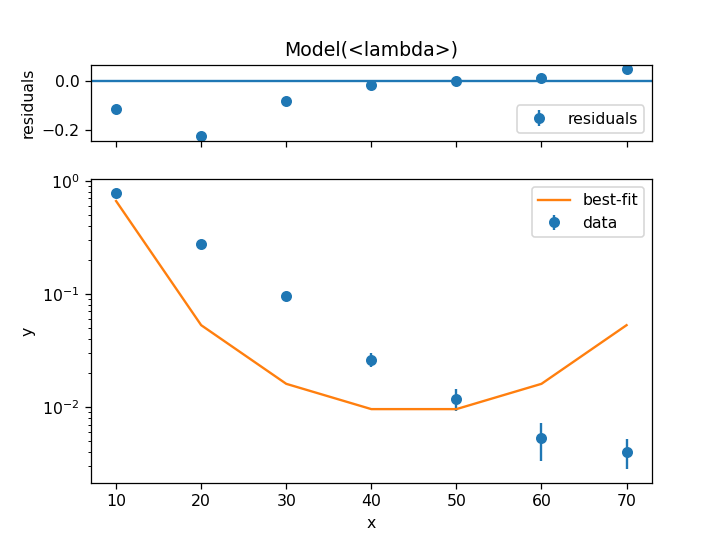

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 7
    # variables        = 2
    chi-square         = 3781.85769
    reduced chi-square = 756.371538
    Akaike info crit   = 48.0444233
    Bayesian info crit = 47.9362436
##  Warning: uncertainties could not be estimated:
[[Variables]]
    A1: -70.0811180 (init = 1)
    A2:  3682.98665 (init = 1)


In [7]:
sin4 = lambda x,A1,A2: 1/(np.sin(np.pi*x/90)**4)*(A1/34+A2/1779) 
sin4model = Model(sin4)

fig = plt.figure()
res = sin4model.fit(nv(data[0].I[1:]/data[0].I[0]),x=nv(data[i].theta)[1:],A1=1,A2=1,weights=1/sd(data[i].I/data[0].I[0])[1:])
fig,grid = res.plot(fig=fig)#,show_init=True)
fig.get_axes()[1].set_yscale('log')
print(str.format(res.fit_report()))

In [8]:
#res.params['amplitude'].value

In [9]:
#res.params

In [10]:
#f"{res.params['amplitude']:.2}$e^{{(x-{res.params['center']:.2})^2}}/{res.params['sigma']:.2}^2$"

In [31]:
def gaussian_mu(x, amp, mu, wid):
    """1-d gaussian: gaussian(x, amplitude, mu, sigma, const)"""
    return amp * np.exp(-(x-mu)**2 / (2*wid**2))

<IPython.core.display.Javascript object>


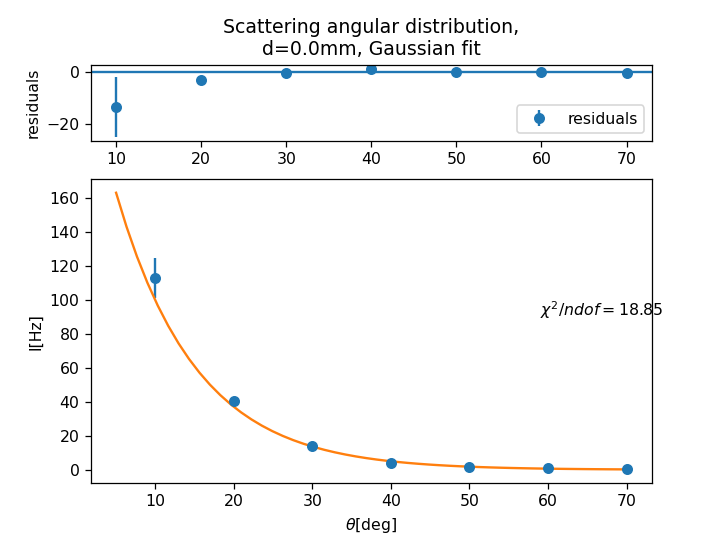

[[Model]]
    Model(gaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8000
    # data points      = 7
    # variables        = 3
    chi-square         = 75.3975073
    reduced chi-square = 18.8493768
    Akaike info crit   = 22.6380485
    Bayesian info crit = 22.4757789
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:  9.9810e+39 (init = 113.2)
    mu:  -1763.19644 (init = 0)
    wid:  134.041299 (init = 20)


<IPython.core.display.Javascript object>


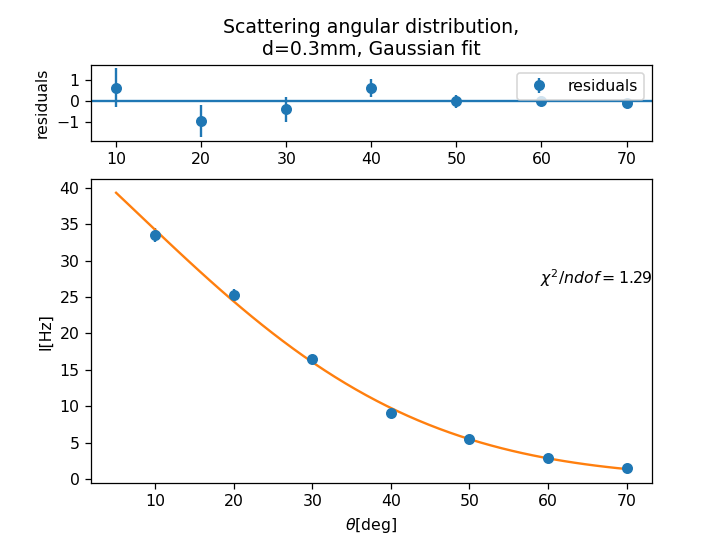

[[Model]]
    Model(gaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 7
    # variables        = 3
    chi-square         = 5.15826909
    reduced chi-square = 1.28956727
    Akaike info crit   = 3.86283649
    Bayesian info crit = 3.70056694
[[Variables]]
    amp:  59.8747782 +/- 12.9086273 (21.56%) (init = 33.56667)
    mu:  -27.4350838 +/- 9.38805043 (34.22%) (init = 0)
    wid:  35.3869360 +/- 2.70102095 (7.63%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, wid)  = -0.989
    C(amp, mu)  = -0.988
    C(amp, wid) =  0.959


<IPython.core.display.Javascript object>


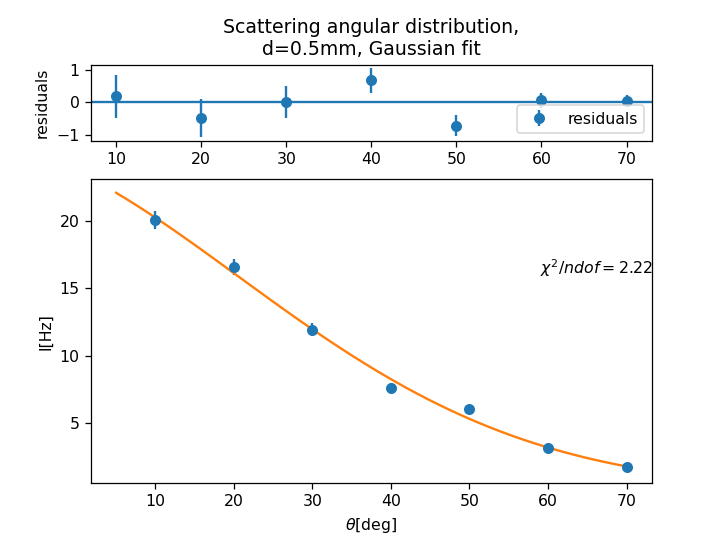

[[Model]]
    Model(gaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 7
    # variables        = 3
    chi-square         = 8.86759442
    reduced chi-square = 2.21689860
    Akaike info crit   = 7.65545384
    Bayesian info crit = 7.49318429
[[Variables]]
    amp:  26.2484589 +/- 5.64658144 (21.51%) (init = 20.06667)
    mu:  -16.9277287 +/- 12.7223070 (75.16%) (init = 0)
    wid:  37.4166913 +/- 4.57547827 (12.23%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, wid)  = -0.985
    C(amp, mu)  = -0.980
    C(amp, wid) =  0.938


<IPython.core.display.Javascript object>


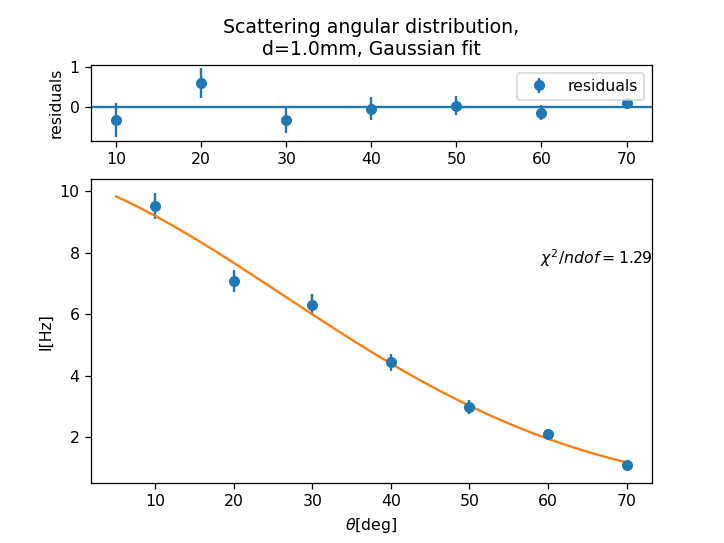

[[Model]]
    Model(gaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 44
    # data points      = 7
    # variables        = 3
    chi-square         = 5.14115934
    reduced chi-square = 1.28528984
    Akaike info crit   = 3.83957920
    Bayesian info crit = 3.67730965
[[Variables]]
    amp:  10.9429716 +/- 2.08952754 (19.09%) (init = 9.516667)
    mu:  -13.2865193 +/- 13.4409039 (101.16%) (init = 0)
    wid:  39.4213351 +/- 5.37000130 (13.62%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(mu, wid)  = -0.984
    C(amp, mu)  = -0.975
    C(amp, wid) =  0.929


In [32]:
gm = Model(gaussian_mu)
sigmas = []
sigmaserr = []
for i in range(4):
    x = nv(data[i].theta)[1:]
    y=nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
#     pars = gm.guess(y, x=x)
#     pars['center'].set(min=-15,max=15) # fit 0 completely wrong, fit 2 chi2/ndof>10
#     pars['center'].set(value=0, vary=False, expr='') # makes all fits worse, but makes more sense. Fits get better if I substract background
    fig,axes = plt.subplots(2,gridspec_kw={"height_ratios":[1,4]})
    res = gm.fit(y,amp=y.max(),mu=0,wid=20,x=x,weights=1/yerr)
    sigmas.append(res.params['wid'].value)
    sigmaserr.append(res.params['wid'].stderr)
    res.plot_residuals(ax=axes[0])
    axes[1].errorbar(x,y,yerr=yerr,fmt='o')
    axes[1].set_ylabel("I[Hz]")
    axes[1].set_xlabel(r'$\theta [\deg]$')
    axes[1].plot(np.linspace(5,70,50),
                 gaussian_mu(np.linspace(5,70,50),res.params['amp'].value,res.params['mu'].value,res.params['wid'].value),
                 label=f"{res.params['amp'].value:.2}$e^{{(x-{res.params['mu'].value:.2})^2}}/{res.params['wid'].value:.2}^2$")
    fig.get_axes()[1].text(59,y[0]*0.8,f"$\chi^2/ndof=${res.redchi:.2f}")
    fig.get_axes()[0].set_title(f"Scattering angular distribution,\nd={ds[i]:.1f}mm, Gaussian fit")
    fig.savefig(f"angle_gauss_{int(ds[i]*10):d}dmm.png")
    print(str.format(res.fit_report()))

#### Fixed center at 0

<IPython.core.display.Javascript object>


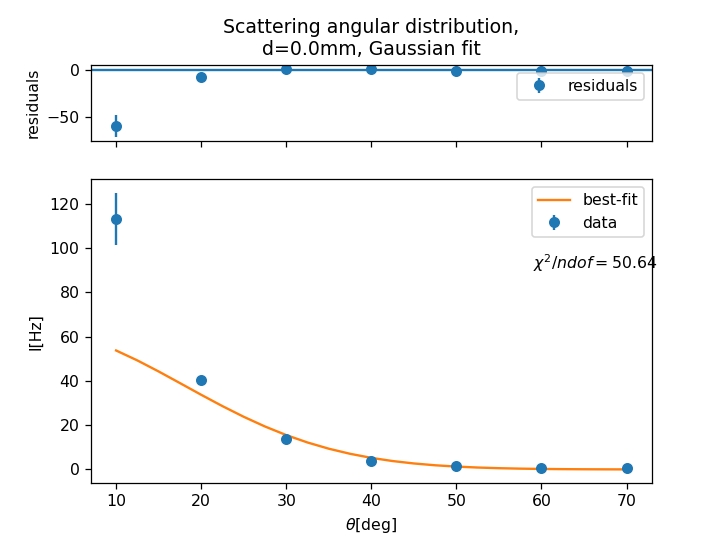

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 7
    # variables        = 2
    chi-square         = 253.219518
    reduced chi-square = 50.6439036
    Akaike info crit   = 29.1184264
    Bayesian info crit = 29.0102467
[[Variables]]
    amplitude:  2824.62664 +/- 847.285132 (30.00%) (init = 3378.345)
    center:     0 (fixed)
    sigma:      17.9496264 +/- 1.74032243 (9.70%) (init = 10)
    fwhm:       42.2681393 +/- 4.09814606 (9.70%) == '2.3548200*sigma'
    height:     62.7791922 +/- 23.7922011 (37.90%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.761


<IPython.core.display.Javascript object>


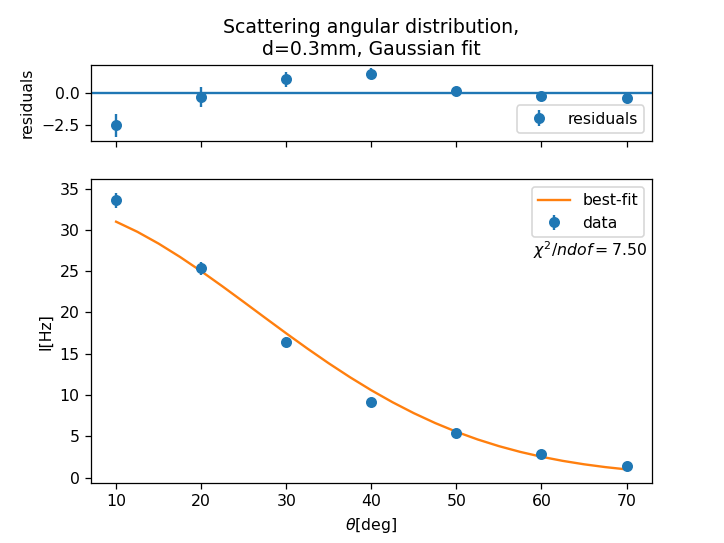

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 7
    # variables        = 2
    chi-square         = 37.5109696
    reduced chi-square = 7.50219393
    Akaike info crit   = 15.7510629
    Bayesian info crit = 15.6428832
[[Variables]]
    amplitude:  2204.69270 +/- 96.2945166 (4.37%) (init = 964.0968)
    center:     0 (fixed)
    sigma:      26.4138018 +/- 0.79547691 (3.01%) (init = 10)
    fwhm:       62.1997487 +/- 1.87320494 (3.01%) == '2.3548200*sigma'
    height:     33.2986968 +/- 1.95097207 (5.86%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.235


<IPython.core.display.Javascript object>


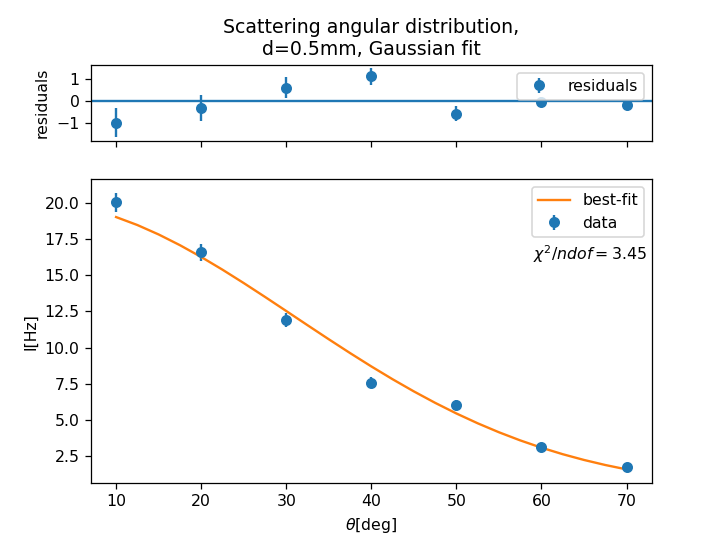

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 7
    # variables        = 2
    chi-square         = 17.2287410
    reduced chi-square = 3.44574819
    Akaike info crit   = 10.3046818
    Bayesian info crit = 10.1965021
[[Variables]]
    amplitude:  1555.02862 +/- 50.7381435 (3.26%) (init = 550.5)
    center:     0 (fixed)
    sigma:      30.9069878 +/- 0.85601497 (2.77%) (init = 10)
    fwhm:       72.7803929 +/- 2.01576118 (2.77%) == '2.3548200*sigma'
    height:     20.0720529 +/- 0.90162478 (4.49%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = -0.103


<IPython.core.display.Javascript object>


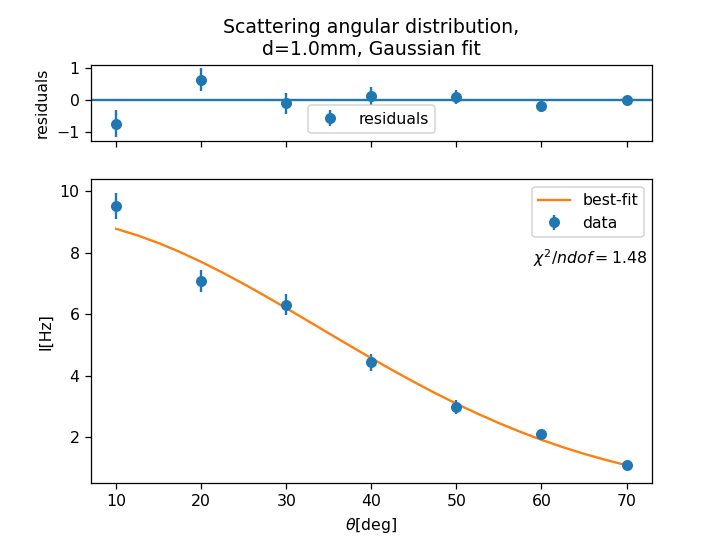

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 7
    # variables        = 2
    chi-square         = 7.38846749
    reduced chi-square = 1.47769350
    Akaike info crit   = 4.37807131
    Bayesian info crit = 4.26989161
[[Variables]]
    amplitude:  778.223891 +/- 22.2377854 (2.86%) (init = 253)
    center:     0 (fixed)
    sigma:      33.8791122 +/- 0.92181912 (2.72%) (init = 10)
    fwhm:       79.7792110 +/- 2.17071811 (2.72%) == '2.3548200*sigma'
    height:     9.16394818 +/- 0.36130266 (3.94%) == '0.3989423*amplitude/max(1e-15, sigma)'


In [22]:
gm = GaussianModel()
sigmas = []
sigmaserr = []
for i in range(4):
    x = nv(data[i].theta)[1:]
    y=nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
    pars = gm.guess(y, x=x)
#     pars['center'].set(min=-15,max=15) # fit 0 completely wrong, fit 2 chi2/ndof>10
    pars['center'].set(value=0, vary=False, expr='')
    fig = plt.figure()
    res = gm.fit(y,pars,x=x,weights=1/yerr)
    sigmas.append(res.params['sigma'].value)
    sigmaserr.append(res.params['sigma'].stderr)
    res.plot(fig=fig,numpoints=25,xlabel=r'$\theta [\deg]$',ylabel="I[Hz]")
    fig.get_axes()[1].text(59,y[0]*0.8,f"$\chi^2/ndof=${res.redchi:.2f}")
    fig.get_axes()[0].set_title(f"Scattering angular distribution,\nd={ds[i]:.1f}mm, Gaussian fit")
    fig.savefig(f"angle_gauss_{int(ds[i]*10):d}dmm.png")
    print(str.format(res.fit_report()))

In [ ]:
sigmas = np.array(sigmas)
sigmaserr = np.array(sigmaserr)

In [ ]:
lmod = LinearModel()
par = lmod.guess(ds[1:],sigmas[1:])
lres = lmod.fit(sigmas[1:],x=np.sqrt(ds[1:]),weights=1/sigmaserr[1:])
fig = plt.figure()
lres.plot(fig=fig)
fig.get_axes()[0].set_title("Width of scattering Gaussian as a function of $\sqrt{d}$\nWeighted Linear Fit")
fig.get_axes()[1].set_ylabel(r'$\sigma$')
fig.get_axes()[1].set_xlabel(r'$\sqrt{d[mm]}$')
print(str.format(lres.fit_report()))

In [ ]:
fig,ax = plt.subplots()
ax.errorbar(np.sqrt(ds),sigmas,yerr=sigmaserr,fmt='o')

### Double gaussian (starts to overfit)

In [33]:
def gaussian(x, amp, wid):
    """1-d gaussian: gaussian(x, amplitude, mu, sigma, const)"""
    return amp * np.exp(-x**2 / (2*wid**2))
def doubleg(x, amp, amp2, wid, wid2):
    return gaussian(x, amp, wid) + gaussian(x, amp2,  wid2)
gmodel = Model(doubleg)
gmodel.set_param_hint('wid',min=1)
g2model = Model(doubleg)
g2model.set_param_hint('wid',min=1)
g2model.set_param_hint('wid2',min=1)

<IPython.core.display.Javascript object>


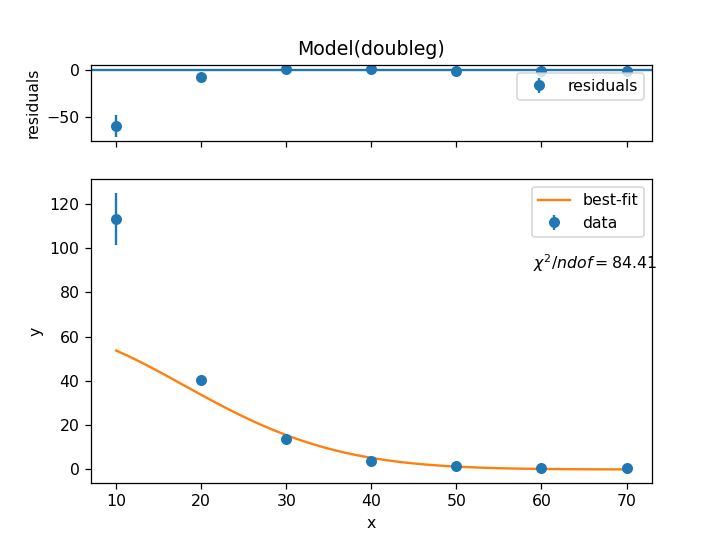

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 7
    # variables        = 4
    chi-square         = 253.219512
    reduced chi-square = 84.4065040
    Akaike info crit   = 33.1184262
    Bayesian info crit = 32.9020668
[[Variables]]
    amp:   69.9545611 +/- 3.7757e+08 (539732688.72%) (init = 56.6)
    amp2: -7.19613128 +/- 3.7757e+08 (5246813697.66%) (init = 56.6)
    wid:   17.9513994 +/- 7792.50824 (43408.92%) (init = 20)
    wid2:  17.9514289 +/- 105736.185 (589012.64%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, amp2)  = -1.000
    C(amp, wid2)  = -0.934
    C(amp2, wid2) =  0.934
    C(amp2, wid)  = -0.866
    C(amp, wid)   =  0.866
    C(wid, wid2)  = -0.630


<ipython-input-34-46d7ea35062f>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


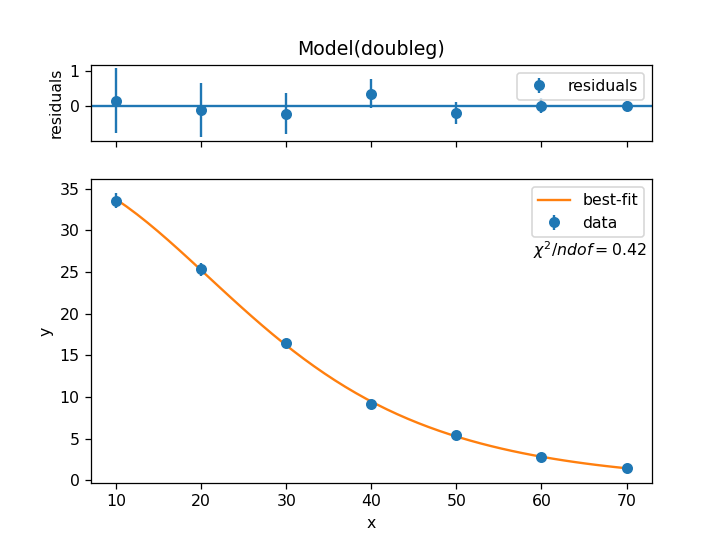

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 61
    # data points      = 7
    # variables        = 4
    chi-square         = 1.27478339
    reduced chi-square = 0.42492780
    Akaike info crit   = -3.92193711
    Bayesian info crit = -4.13829652
[[Variables]]
    amp:   21.4322488 +/- 4.13881053 (19.31%) (init = 16.78333)
    amp2:  15.8726345 +/- 4.47999633 (28.22%) (init = 16.78333)
    wid:   18.8047962 +/- 1.69595983 (9.02%) (init = 20)
    wid2:  31.8563241 +/- 1.95696075 (6.14%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp2, wid2) = -0.987
    C(amp, amp2)  = -0.985
    C(amp, wid2)  =  0.980
    C(amp2, wid)  = -0.959
    C(wid, wid2)  =  0.921
    C(amp, wid)   =  0.912


<IPython.core.display.Javascript object>


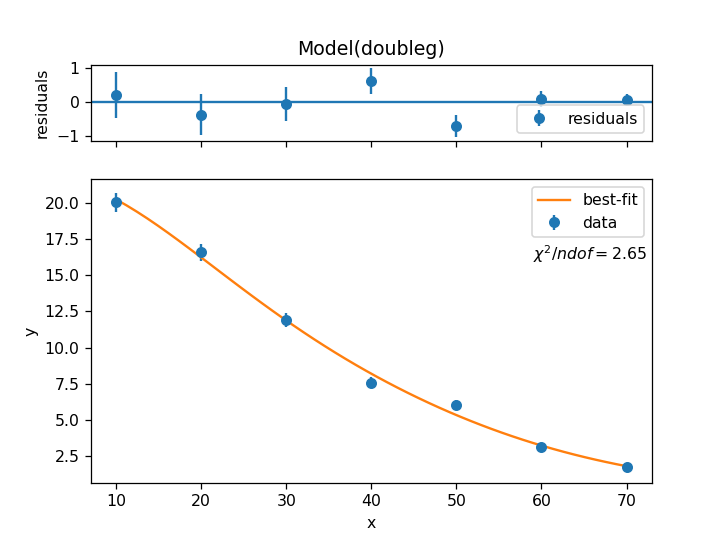

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 87
    # data points      = 7
    # variables        = 4
    chi-square         = 7.93590030
    reduced chi-square = 2.64530010
    Akaike info crit   = 8.87840661
    Bayesian info crit = 8.66204720
[[Variables]]
    amp:   5.54659431 +/- 4.15371463 (74.89%) (init = 10.03333)
    amp2:  16.4363173 +/- 4.64360547 (28.25%) (init = 10.03333)
    wid:   16.0267605 +/- 9.09766626 (56.77%) (init = 20)
    wid2:  33.1494756 +/- 2.85755284 (8.62%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp2, wid2) = -0.966
    C(amp, amp2)  = -0.928
    C(amp, wid2)  =  0.916
    C(amp2, wid)  = -0.912
    C(wid, wid2)  =  0.836
    C(amp, wid)   =  0.739


<IPython.core.display.Javascript object>


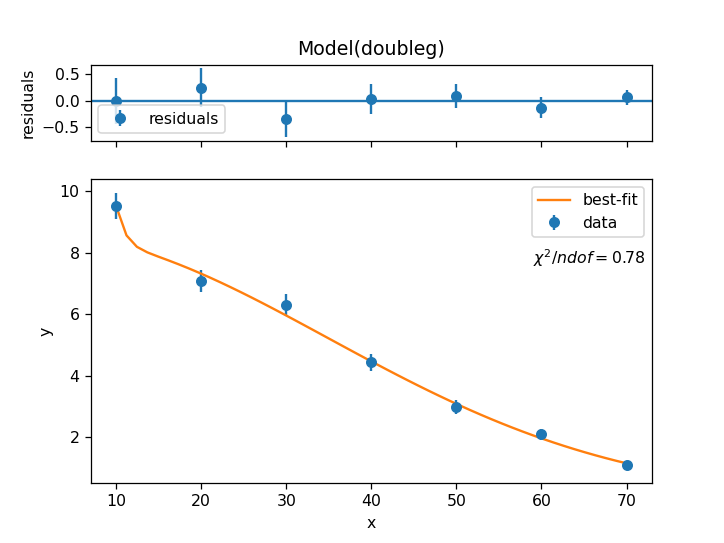

[[Model]]
    Model(doubleg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 549
    # data points      = 7
    # variables        = 4
    chi-square         = 2.34546385
    reduced chi-square = 0.78182128
    Akaike info crit   = 0.34601125
    Bayesian info crit = 0.12965184
[[Variables]]
    amp:   8.62425723 +/- 0.49499506 (5.74%) (init = 4.758333)
    amp2:  129.294962 +/- 18029016.7 (13944098.37%) (init = 4.758333)
    wid:   34.8350028 +/- 1.02616275 (2.95%) (init = 20)
    wid2:  3.28031006 +/- 50033.8492 (1525278.05%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp2, wid2) = -1.000
    C(amp, wid)   = -0.861
    C(amp, wid2)  = -0.743
    C(amp, amp2)  =  0.743
    C(wid, wid2)  =  0.602
    C(amp2, wid)  = -0.602


In [34]:
for i in range(4):
#     pars = gm.guess(nv(data[i].I), x=nv(data[i].theta))
#     pars['center'].set(value=0, vary=False, expr='')
    fig = plt.figure()
    x = nv(data[i].theta)[1:]
    y=nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
    res = g2model.fit(y,x=x,amp=y.max()/2,
                      amp2=y.max()/2,wid=20,wid2=20,weights=1/yerr)
    fig,grid = res.plot(fig=fig,numpoints=50)#,show_init=True)
#     fig.get_axes()[1].set_yscale('log')
    fig.get_axes()[1].text(59,y[0]*0.8,f"$\chi^2/ndof=${res.redchi:.2f}")
    print(str.format(res.fit_report()))

#### Gaussian+const

<IPython.core.display.Javascript object>


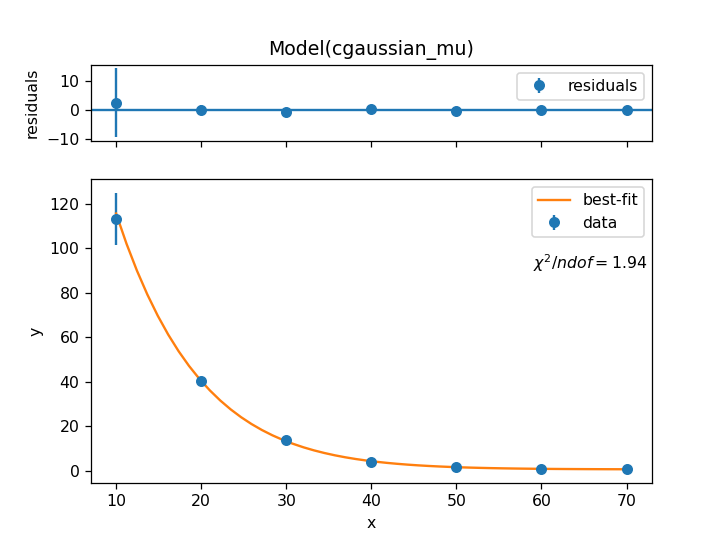

[[Model]]
    Model(cgaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 420
    # data points      = 7
    # variables        = 4
    chi-square         = 5.81519223
    reduced chi-square = 1.93839741
    Akaike info crit   = 6.70194585
    Bayesian info crit = 6.48558645
[[Variables]]
    amp:  59733.1471 +/- 443483.691 (742.44%) (init = 56.6)
    cen: -112.505446 +/- 127.108703 (112.98%) (init = 0)
    wid:  34.6452464 +/- 15.6568580 (45.19%) (init = 20)
    c:    0.54074673 +/- 0.08820847 (16.31%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen) = -0.999
    C(cen, wid) = -0.999
    C(amp, wid) =  0.997
    C(wid, c)   = -0.669
    C(cen, c)   =  0.654
    C(amp, c)   = -0.638


c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument amp2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +
c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument wid2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +


<IPython.core.display.Javascript object>


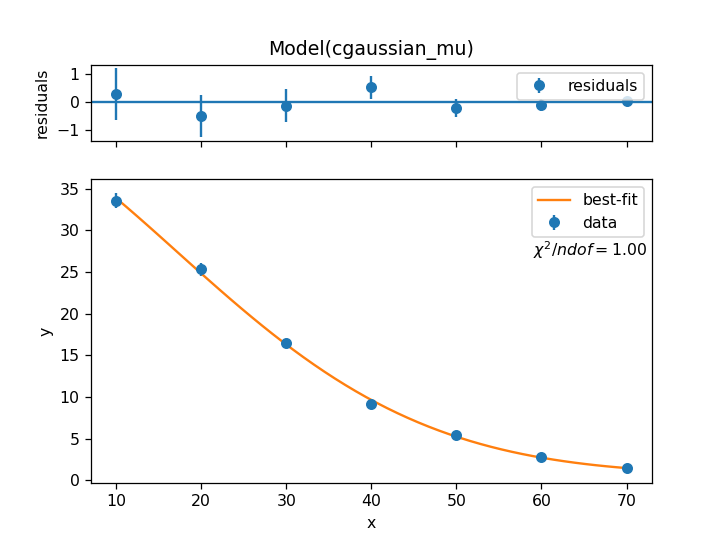

[[Model]]
    Model(cgaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 7
    # variables        = 4
    chi-square         = 2.99099546
    reduced chi-square = 0.99699849
    Akaike info crit   = 2.04787279
    Bayesian info crit = 1.83151339
[[Variables]]
    amp:  44.1904516 +/- 7.65835887 (17.33%) (init = 16.78333)
    cen: -12.0176861 +/- 8.23638892 (68.54%) (init = 0)
    wid:  29.1893314 +/- 3.35240851 (11.49%) (init = 20)
    c:    0.60906588 +/- 0.32921850 (54.05%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen) = -0.987
    C(cen, wid) = -0.986
    C(amp, wid) =  0.952
    C(wid, c)   = -0.872
    C(cen, c)   =  0.800
    C(amp, c)   = -0.749


c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument amp2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +
c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument wid2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +


<IPython.core.display.Javascript object>


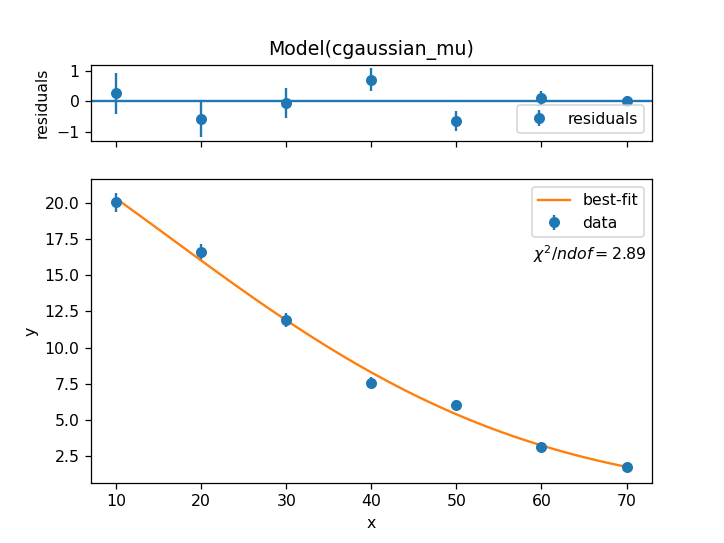

c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument amp2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +
c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument wid2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +


[[Model]]
    Model(cgaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 7
    # variables        = 4
    chi-square         = 8.67783002
    reduced chi-square = 2.89261001
    Akaike info crit   = 9.50402945
    Bayesian info crit = 9.28767005
[[Variables]]
    amp:  29.7576633 +/- 20.0508940 (67.38%) (init = 10.03333)
    cen: -25.2887528 +/- 44.8969853 (177.54%) (init = 0)
    wid:  41.7100806 +/- 20.9623230 (50.26%) (init = 20)
    c:   -0.46888133 +/- 2.06038858 (439.43%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen) = -0.996
    C(cen, wid) = -0.991
    C(amp, wid) =  0.979
    C(wid, c)   = -0.950
    C(cen, c)   =  0.904
    C(amp, c)   = -0.885


<IPython.core.display.Javascript object>


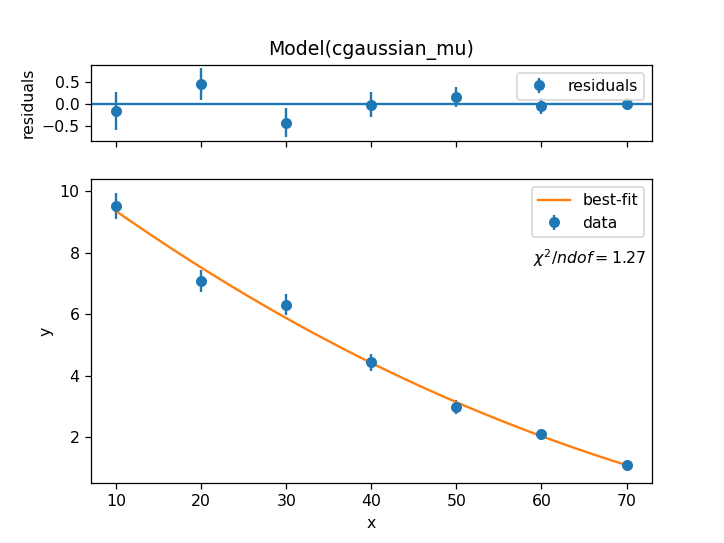

[[Model]]
    Model(cgaussian_mu)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 35
    # data points      = 7
    # variables        = 4
    chi-square         = 3.80110529
    reduced chi-square = 1.26703510
    Akaike info crit   = 3.72567220
    Bayesian info crit = 3.50931279
[[Variables]]
    amp:  44.8752072 +/- 371.975688 (828.91%) (init = 4.758333)
    cen: -155.409763 +/- 1036.28171 (666.81%) (init = 0)
    wid:  102.961086 +/- 347.568838 (337.57%) (init = 20)
    c:   -2.99975224 +/- 10.0834909 (336.14%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen) = -1.000
    C(cen, wid) = -0.999
    C(amp, wid) =  0.998
    C(wid, c)   = -0.991
    C(cen, c)   =  0.985
    C(amp, c)   = -0.980


c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument amp2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +
c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\lmfit\model.py:968: UserWarning: The keyword argument wid2 does not match any arguments of the model function. It will be ignored.
  warnings.warn("The keyword argument %s does not " % name +


In [36]:
def cgaussian_mu(x, amp, cen, wid,c):
    """1-d gaussian: gaussian(x, amplitude, mu, sigma, const)"""
    return amp * np.exp(-(x-cen)**2 / (2*wid**2))+c
cgmodel = Model(cgaussian_mu)
cgmodel.set_param_hint('wid',min=1)
# g2model.set_param_hint('cen',value=0,vary=False)
cgmodel.set_param_hint('c',value=0.3)
for i in range(4):
    x = nv(data[i].theta)[1:]
    y=nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
#     pars = gm.guess(nv(data[i].I), x=nv(data[i].theta))
    fig = plt.figure()
    res = cgmodel.fit(y,x=x,amp=y.max()/2,
                      amp2=y.max()/2,cen=0, wid=20,wid2=20,weights=1/yerr)
    fig,grid = res.plot(fig=fig,numpoints=50)#,show_init=True)
    fig.get_axes()[1].text(59,y[0]*0.8,f"$\chi^2/ndof=${res.redchi:.2f}")
#     fig.get_axes()[1].set_yscale('log')
    print(str.format(res.fit_report()))

#### Gaussian+const, fixed center at 0

In [49]:
f"{res.params['amp'].value:.2f}$e^{{\frac{{-x^2}}{{2*{res.params['wid'].value:.2f}^2}}}}+{res.params['c'].value:.2f}$"

'9.03$e^{\x0crac{-x^2}{2*32.52^2}}+0.25$'

<IPython.core.display.Javascript object>


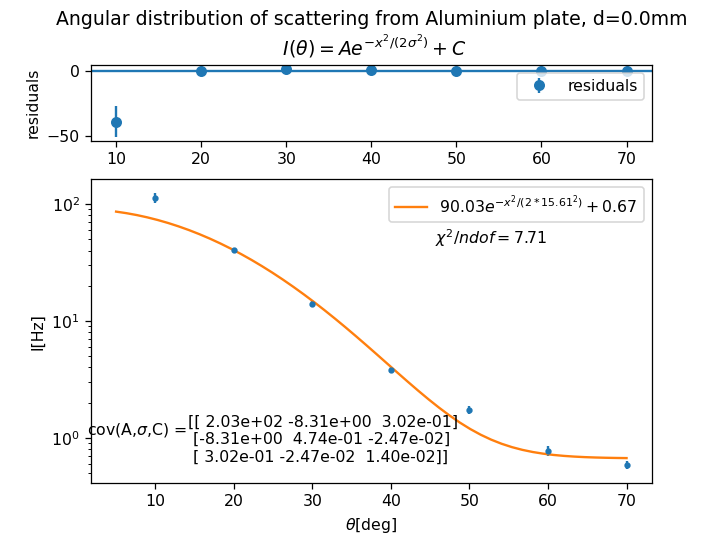

c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[[Model]]
    Model(cgaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 7
    # variables        = 3
    chi-square         = 30.8553036
    reduced chi-square = 7.71382590
    Akaike info crit   = 16.3837895
    Bayesian info crit = 16.2215200
[[Variables]]
    amp:  90.0343554 +/- 14.2589902 (15.84%) (init = 56.6)
    wid:  15.6116472 +/- 0.68842995 (4.41%) (init = 20)
    c:    0.66750510 +/- 0.11813978 (17.70%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) = -0.846
    C(wid, c)   = -0.304
    C(amp, c)   =  0.179


<IPython.core.display.Javascript object>


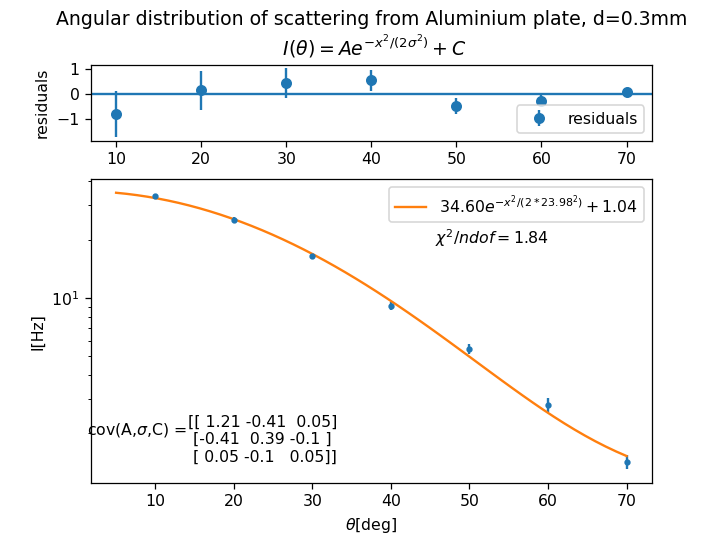

c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[[Model]]
    Model(cgaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 7
    # variables        = 3
    chi-square         = 7.37423302
    reduced chi-square = 1.84355826
    Akaike info crit   = 6.36457226
    Bayesian info crit = 6.20230270
[[Variables]]
    amp:  34.6007044 +/- 1.10205035 (3.19%) (init = 16.78333)
    wid:  23.9787577 +/- 0.62205727 (2.59%) (init = 20)
    c:    1.04182615 +/- 0.22177538 (21.29%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, c)   = -0.746
    C(amp, wid) = -0.593
    C(amp, c)   =  0.202


<IPython.core.display.Javascript object>


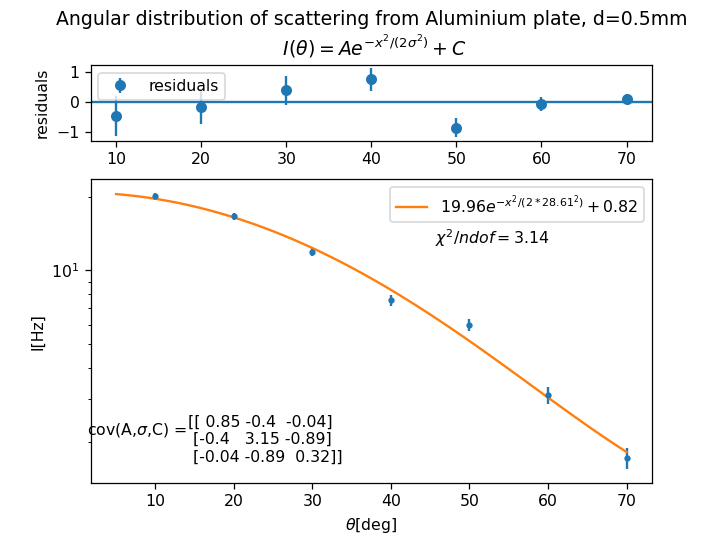

c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[[Model]]
    Model(cgaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 7
    # variables        = 3
    chi-square         = 12.5568928
    reduced chi-square = 3.13922320
    Akaike info crit   = 10.0905171
    Bayesian info crit = 9.92824760
[[Variables]]
    amp:  19.9629192 +/- 0.92299536 (4.62%) (init = 10.03333)
    wid:  28.6135655 +/- 1.77402208 (6.20%) (init = 20)
    c:    0.81751100 +/- 0.56943559 (69.65%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, c)   = -0.884
    C(amp, wid) = -0.243


<IPython.core.display.Javascript object>


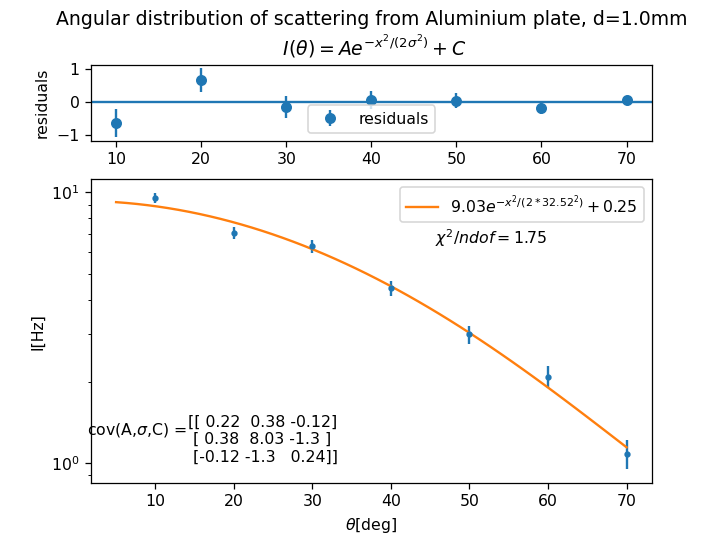

c:\users\tsrun\.virtualenvs\beta-report-snzlwprn\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[[Model]]
    Model(cgaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 7
    # variables        = 3
    chi-square         = 7.01086884
    reduced chi-square = 1.75271721
    Akaike info crit   = 6.01086041
    Bayesian info crit = 5.84859086
[[Variables]]
    amp:  9.03486330 +/- 0.47429691 (5.25%) (init = 4.758333)
    wid:  32.5161005 +/- 2.83402131 (8.72%) (init = 20)
    c:    0.25344022 +/- 0.49202825 (194.14%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(wid, c)   = -0.935
    C(amp, c)   = -0.520
    C(amp, wid) =  0.281


In [82]:
def cgaussian(x, amp, wid,c):
    """1-d gaussian: gaussian(x, amplitude, mu, sigma, const)"""
    return amp * np.exp(-x**2 / (2*wid**2))+c
cgmodel = Model(cgaussian)
cgmodel.set_param_hint('wid',min=1)
# g2model.set_param_hint('cen',value=0,vary=False)
cgmodel.set_param_hint('c',value=0.6)
sigmas = []
sigmaserr = []
for i in range(4):
    x = nv(data[i].theta)[1:]
    y=nv(data[i].I)[1:]
    yerr = sd(data[i].I)[1:]
#     pars = gm.guess(nv(data[i].I), x=nv(data[i].theta))
    fig,axes = plt.subplots(2,gridspec_kw={"height_ratios":[1,4]})
    
    res = cgmodel.fit(y,x=x,amp=y.max()/2,wid=20,c=0.3,weights=1/yerr)
    sigmas.append(res.params['wid'].value)
    sigmaserr.append(res.params['wid'].stderr)
    res.plot_residuals(ax=axes[0])
    axes[1].errorbar(x,y,yerr=yerr,fmt='.')
    axes[1].set_ylabel("I[Hz]")
    axes[1].set_xlabel(r'$\theta [\deg]$')
    
    axes[1].plot(np.linspace(5,70,50),
                 cgaussian(np.linspace(5,70,50),res.params['amp'].value,res.params['wid'].value,res.params['c'].value),
                 label=f"{res.params['amp'].value:.2f}$e^{{-x^2/(2*{res.params['wid'].value:.2f}^2)}}+{res.params['c'].value:.2f}$")
    axes[1].legend()
    axes[0].set_title(f"Angular distribution of scattering from Aluminium plate, d={ds[i]:.1f}mm\n $I(\\theta)=Ae^{{-x^2/(2\sigma^2)}}+C$")
#     fig,grid = res.plot(fig=fig,numpoints=50)#,show_init=True)
    fig.text(0.6,0.55,f"$\chi^2/ndof=${res.redchi:.2f}")
    fig.text(0.12,0.2,'cov(A,$\sigma$,C) =')
    with np.printoptions(precision=2, suppress=False):
        fig.text(0.26,0.15,res.covar)
    fig.get_axes()[1].set_yscale('log')
    fig.savefig(f'angle_gconst_{int(ds[i]*10):d}dmm.png')
    print(str.format(res.fit_report()))

In [71]:
sigmas = np.array(sigmas)
sigmaserr = np.array(sigmaserr)

<IPython.core.display.Javascript object>


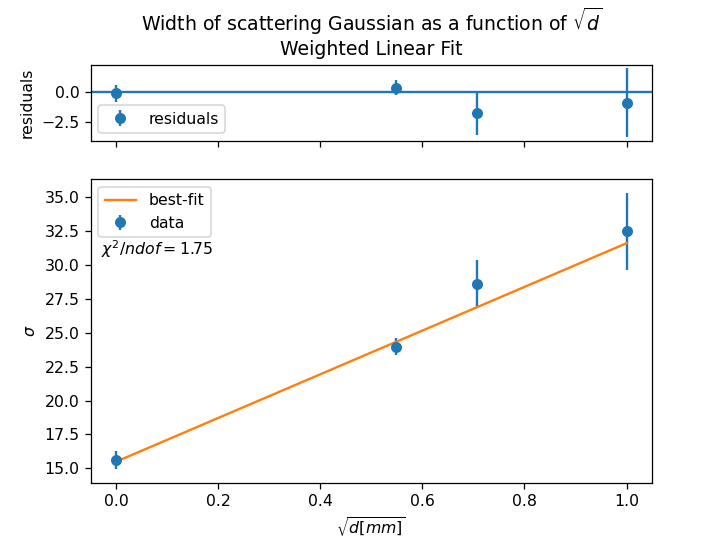

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 4
    # variables        = 2
    chi-square         = 1.37828118
    reduced chi-square = 0.68914059
    Akaike info crit   = -0.26182863
    Bayesian info crit = -1.48923990
[[Variables]]
    slope:      16.1320947 +/- 1.23419895 (7.65%) (init = 1)
    intercept:  15.4931614 +/- 0.56031165 (3.62%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.757


In [79]:
lmod = LinearModel()
par = lmod.guess(ds,sigmas)
lres = lmod.fit(sigmas,x=np.sqrt(ds),weights=1/sigmaserr)
fig = plt.figure()
lres.plot(fig=fig)
fig.get_axes()[0].set_title("Width of scattering Gaussian as a function of $\sqrt{d}$\nWeighted Linear Fit")
fig.get_axes()[1].set_ylabel(r'$\sigma$')
fig.get_axes()[1].set_xlabel(r'$\sqrt{d[mm]}$')
fig.text(0.14,0.53,f"$\chi^2/ndof=${res.redchi:.2f}")
print(str.format(lres.fit_report()))

<IPython.core.display.Javascript object>


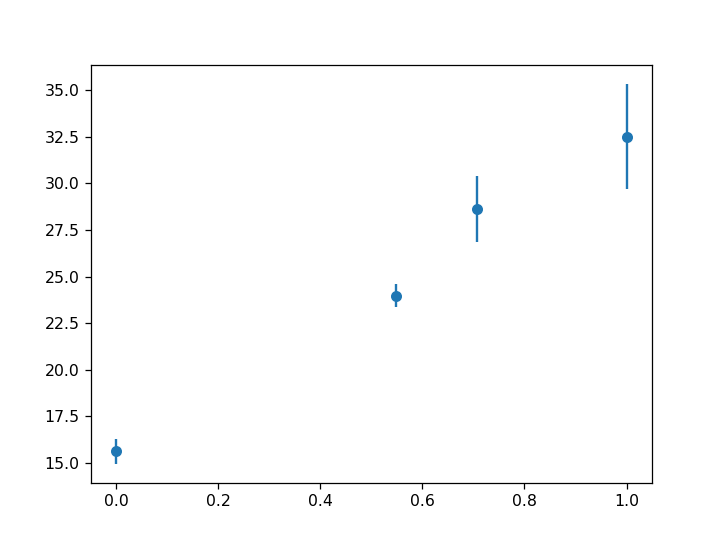

<ErrorbarContainer object of 3 artists>

In [73]:
fig,ax = plt.subplots()
ax.errorbar(np.sqrt(ds),sigmas,yerr=sigmaserr,fmt='o')

In [61]:
res.covar

array([[ 0.22495756,  0.37766007, -0.12139286],
       [ 0.37766007,  8.03167678, -1.30412907],
       [-0.12139286, -1.30412907,  0.2420918 ]])